<a href="https://colab.research.google.com/github/ShlokMohanty/SML/blob/visualization/DIsease_Detection__using_symptoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
import pandas as pd
uploaded = files.upload()


Saving alzheimers_disease_data.csv to alzheimers_disease_data (1).csv
Saving Chronic_Kidney_Dsease_data.csv to Chronic_Kidney_Dsease_data.csv
Saving heart_disease_health_indicators_BRFSS2015.csv to heart_disease_health_indicators_BRFSS2015 (1).csv
Saving Maternal Health Risk Data Set 2.csv to Maternal Health Risk Data Set 2 (1).csv
Saving parkinsons.csv to parkinsons (1).csv


In [4]:
import pandas as pd
import numpy as np
alzheimers_data = pd.read_csv('alzheimers_disease_data.csv')
chronic_kidney_data = pd.read_csv('Chronic_Kidney_Dsease_data.csv')
maternal_health_data = pd.read_csv('Maternal Health Risk Data Set 2.csv')
parkinsons_data = pd.read_csv('parkinsons.csv')
heart_disease_data = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')



In [ ]:
alzheimers_data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


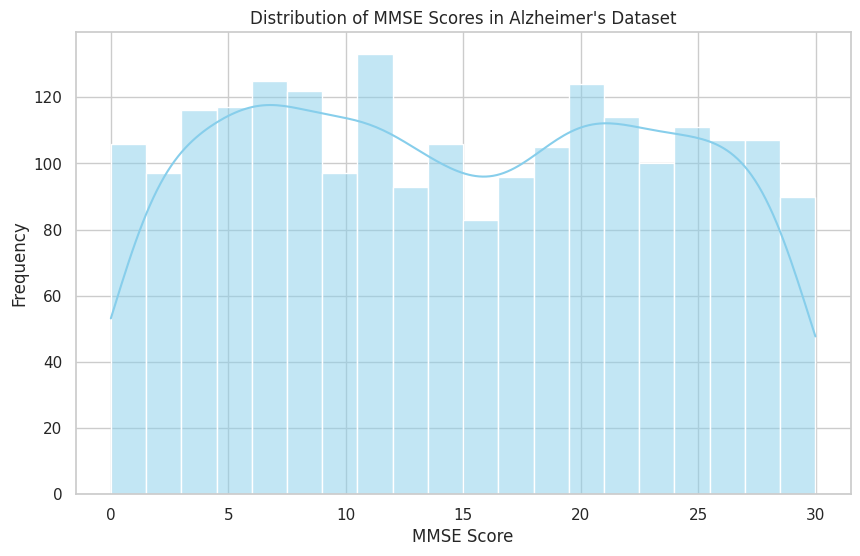

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization setup
sns.set(style="whitegrid")

# 1. Alzheimer's Disease Data: Distribution of MMSE (Mini-Mental State Examination) scores
plt.figure(figsize=(10, 6))
sns.histplot(alzheimers_data['MMSE'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of MMSE Scores in Alzheimer's Dataset")
plt.xlabel("MMSE Score")
plt.ylabel("Frequency")
plt.show()




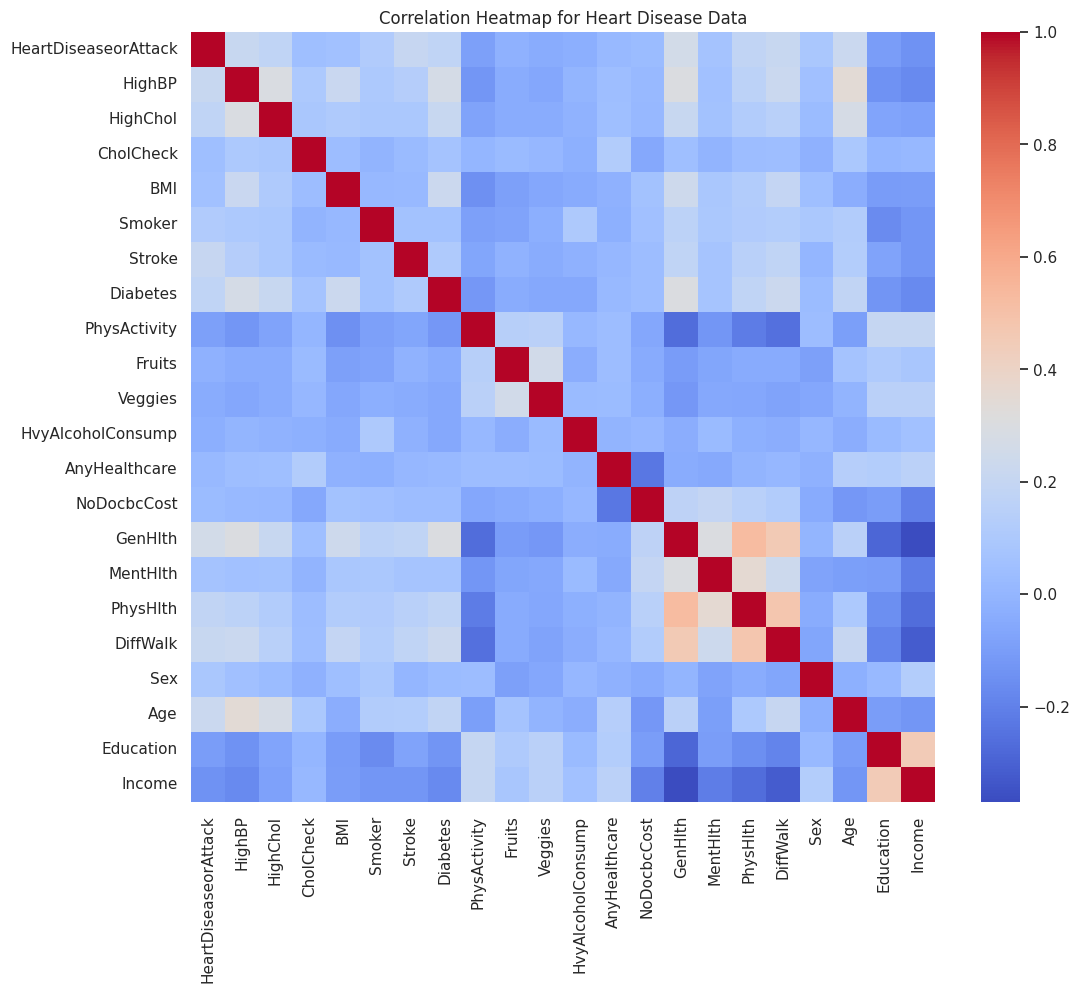

In [6]:
# 2. Heart Disease Data: Correlation heatmap
plt.figure(figsize=(12, 10))
corr = heart_disease_data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap for Heart Disease Data")
plt.show()

<ipython-input-8-ea74c576f640>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RiskLevel', data=maternal_health_data, palette='viridis')


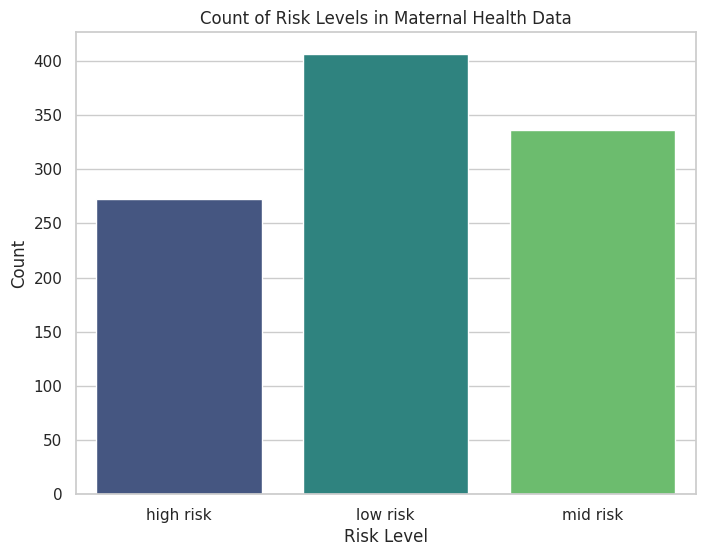

In [8]:
# 3. Maternal Health Risk Data: Risk Level Count
plt.figure(figsize=(8, 6))
sns.countplot(x='RiskLevel', data=maternal_health_data, palette='viridis')
plt.title("Count of Risk Levels in Maternal Health Data")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()

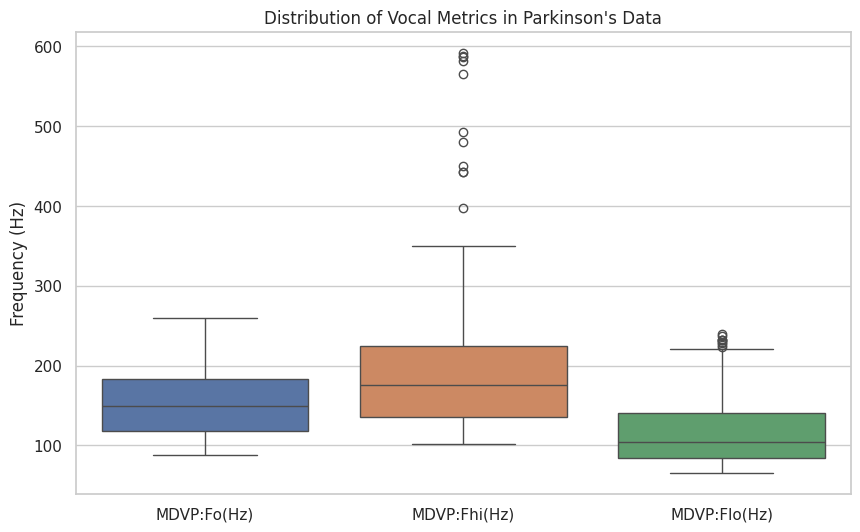

In [9]:
# 4. Parkinson's Disease Data: Distribution of vocal metrics
plt.figure(figsize=(10, 6))
sns.boxplot(data=parkinsons_data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']])
plt.title("Distribution of Vocal Metrics in Parkinson's Data")
plt.ylabel("Frequency (Hz)")
plt.show()


<ipython-input-12-7999da0813f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='MMSE', data=alzheimers_data, palette='Set2')


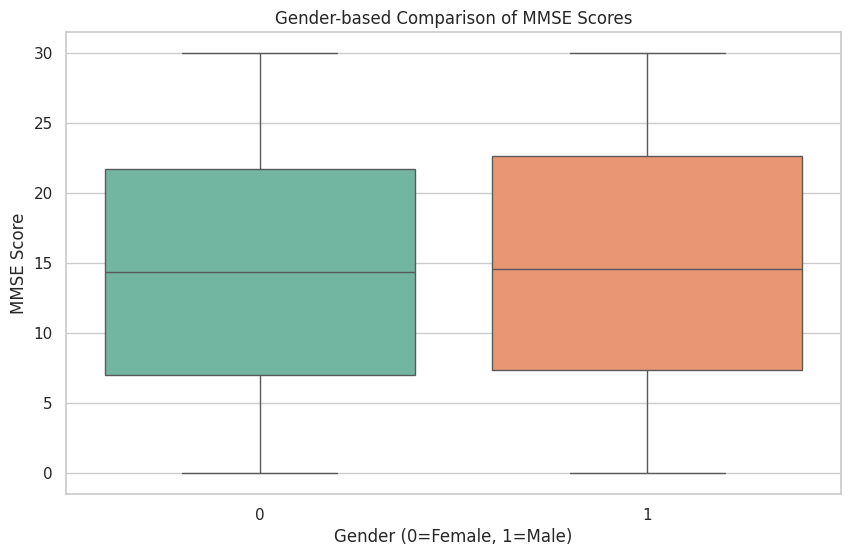

In [12]:

# 5. Alzheimer's Disease Data: Gender-based comparison of MMSE Scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='MMSE', data=alzheimers_data, palette='Set2')
plt.title("Gender-based Comparison of MMSE Scores")
plt.xlabel("Gender (0=Female, 1=Male)")
plt.ylabel("MMSE Score")
plt.show()



<ipython-input-13-b4af1c2fef67>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDiseaseorAttack', y='BMI', data=heart_disease_data, palette='Set1')


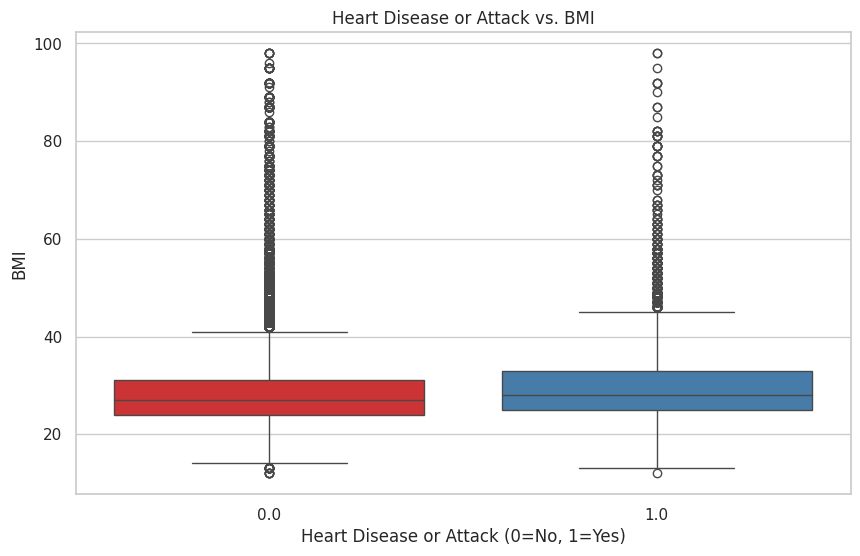

In [13]:
# 6. Heart Disease Data: Heart Disease or Attack vs. BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDiseaseorAttack', y='BMI', data=heart_disease_data, palette='Set1')
plt.title("Heart Disease or Attack vs. BMI")
plt.xlabel("Heart Disease or Attack (0=No, 1=Yes)")
plt.ylabel("BMI")
plt.show()

<ipython-input-14-22358ef343f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y='BMI', data=chronic_kidney_data, palette='coolwarm')


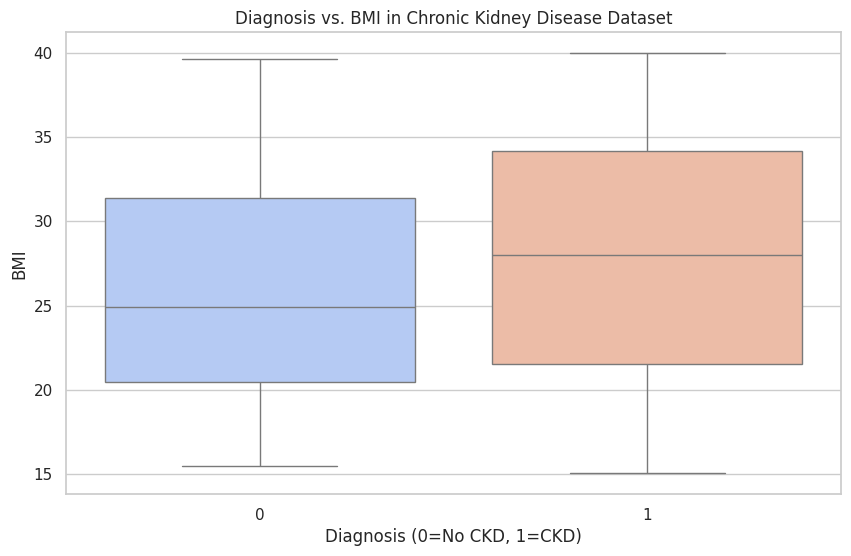

In [14]:
# 7. Chronic Kidney Disease Data: Diagnosis vs. BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosis', y='BMI', data=chronic_kidney_data, palette='coolwarm')
plt.title("Diagnosis vs. BMI in Chronic Kidney Disease Dataset")
plt.xlabel("Diagnosis (0=No CKD, 1=CKD)")
plt.ylabel("BMI")
plt.show()

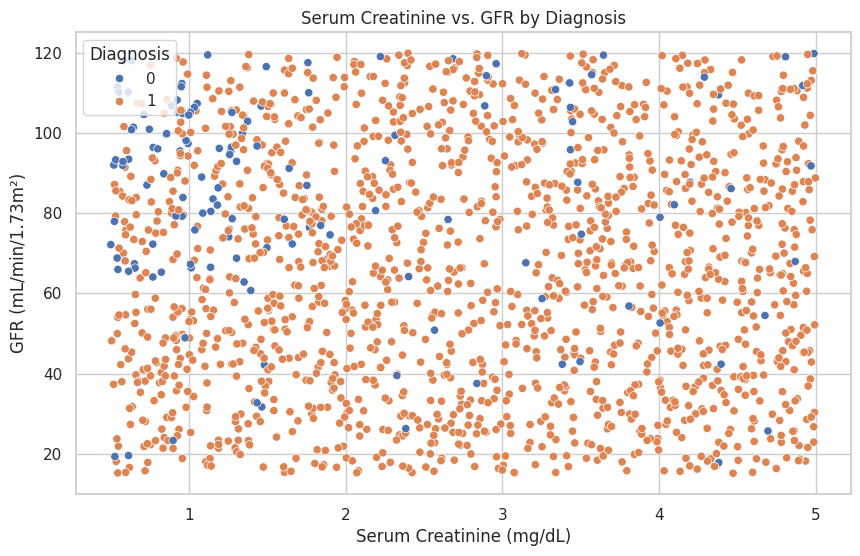

In [15]:
# 8. Chronic Kidney Disease Data: Serum Creatinine vs. GFR
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SerumCreatinine', y='GFR', hue='Diagnosis', data=chronic_kidney_data, palette='deep')
plt.title("Serum Creatinine vs. GFR by Diagnosis")
plt.xlabel("Serum Creatinine (mg/dL)")
plt.ylabel("GFR (mL/min/1.73m²)")
plt.show()

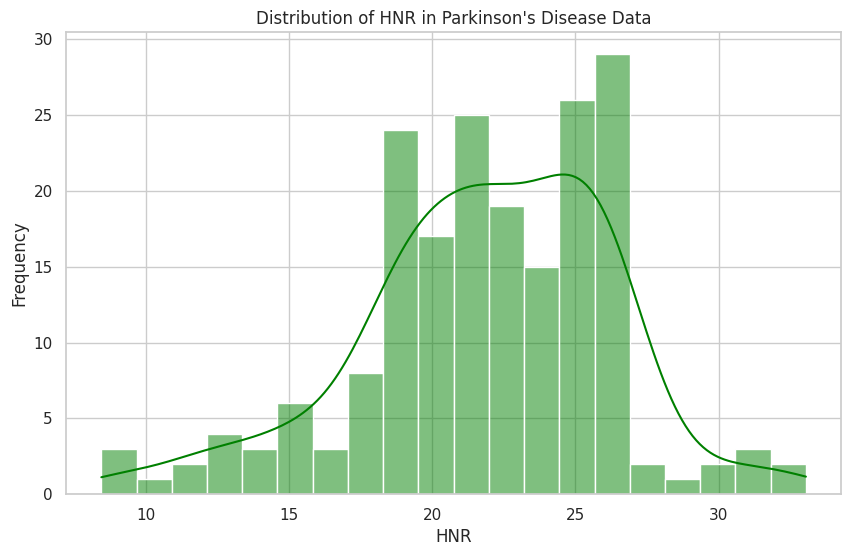

In [16]:
# 9. Parkinson's Disease Data: Distribution of HNR (Harmonic-to-Noise Ratio)
plt.figure(figsize=(10, 6))
sns.histplot(parkinsons_data['HNR'], kde=True, bins=20, color='green')
plt.title("Distribution of HNR in Parkinson's Disease Data")
plt.xlabel("HNR")
plt.ylabel("Frequency")
plt.show()

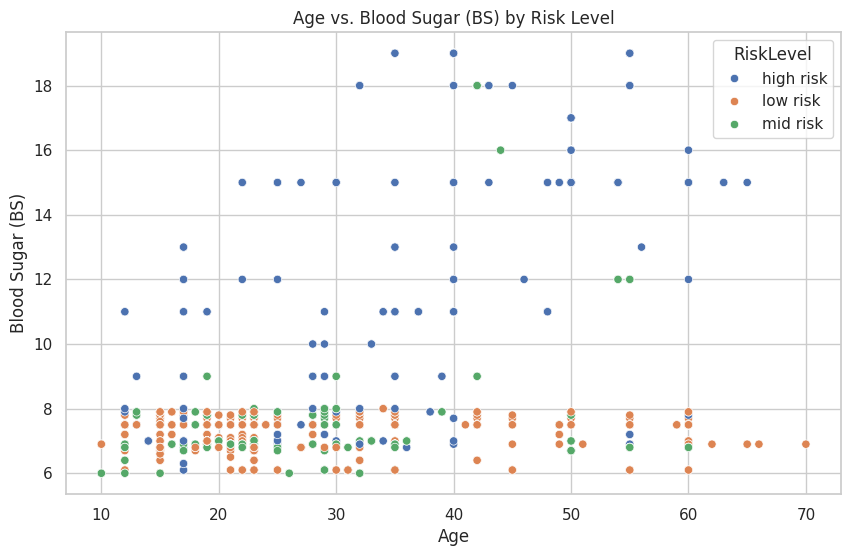

In [17]:
# 10. Maternal Health Risk Data: Age vs. Blood Sugar (BS) colored by Risk Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BS', hue='RiskLevel', data=maternal_health_data, palette='deep')
plt.title("Age vs. Blood Sugar (BS) by Risk Level")
plt.xlabel("Age")
plt.ylabel("Blood Sugar (BS)")
plt.show()

In [ ]:
datasets = [alzheimers_data, chronic_kidney_data, heart_disease_data, maternal_health_data, parkinsons_data]

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
def preprocess_data(data):
  for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

  for col in data.select_dtypes(include=['object']).columns:
    mode_value = data[col].mode()
    if not mode_value.empty:
      data[col].fillna(mode_value.iloc[0], inplace=True)
  return data

In [ ]:
scaler = StandardScaler()

In [ ]:
datasets = [preprocess_data(data) for data in datasets]
for i, data in enumerate(datasets):
  numeric_cols = data.select_dtypes(include=[np.number]).columns
  datasets[i][numeric_cols]= scaler.fit_transform(data[numeric_cols])

<ipython-input-22-d9a93fc596e1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-22-d9a93fc596e1>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
label_encoder = LabelEncoder()
for i, data in enumerate(datasets):
  categorical_cols = data.select_dtypes(include=['object']).columns
  for col in categorical_cols:
    datasets[i][col] = label_encoder.fit_transform(data[col])

In [ ]:
alzheimers_data, chronic_kidney_data, heart_disease_data, maternal_health_data, parkinsons_data = datasets

In [ ]:
maternal_health_data['Hypertension'] = (maternal_health_data['SystolicBP'] > 130) & (maternal_health_data['DiastolicBP'] > 80)

alzheimers_data['LifestyleRisk'] = (
    alzheimers_data['Smoking'] +
    alzheimers_data['AlcoholConsumption'] +
    alzheimers_data['PhysicalActivity'] +
    alzheimers_data['DietQuality']
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier


In [ ]:
X = maternal_health_data.drop(['RiskLevel'], axis=1)
y = maternal_health_data['RiskLevel']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        47
           1       0.86      0.74      0.79        80
           2       0.74      0.84      0.79        76

    accuracy                           0.80       203
   macro avg       0.81      0.81      0.81       203
weighted avg       0.81      0.80      0.80       203



In [ ]:
print("ROC_AUC score:", roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), average='macro'))

ROC_AUC score: 0.8538990204767466


In [ ]:
models = {
    "logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "K-Nearest Neighbors" : KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metrics='mlogloss', use_label_encoder=False),
    "LightGBM": LGBMClassifier(),
    "Neural Network": MLPClassifier(max_iter=500)



}

In [ ]:
X = maternal_health_data.drop(['RiskLevel'], axis=1)
y = maternal_health_data['RiskLevel']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
results = {}
for name, model in models.items():
  print(f"Training {name}....")
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  if y_pred_proba is not None:
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
  else:
    roc_auc = "N/A"

  results[name] = {
      'Accuracy': accuracy,
      'Precision': precision,
      'Recall': recall,
      'F1-Score': f1,
      'ROC AUC': roc_auc
  }
  #roc_auc = roc_auc_score(y_test, pd.get_dummies(y_pred), average='weighted') if y_pred_proba is not None else "N/A"

  results_data = pd.DataFrame(results).T
  print('\nEvaluation Results:')
  print(results_data)

Training logistic Regression....

Evaluation Results:
                     Accuracy  Precision    Recall  F1-Score   ROC AUC
logistic Regression  0.650246   0.659397  0.650246   0.61203  0.797282
Training SVM....

Evaluation Results:
                     Accuracy  Precision    Recall  F1-Score   ROC AUC
logistic Regression  0.650246   0.659397  0.650246  0.612030  0.797282
SVM                  0.679803   0.700964  0.679803  0.657794  0.812551
Training K-Nearest Neighbors....

Evaluation Results:
                     Accuracy  Precision    Recall  F1-Score   ROC AUC
logistic Regression  0.650246   0.659397  0.650246  0.612030  0.797282
SVM                  0.679803   0.700964  0.679803  0.657794  0.812551
K-Nearest Neighbors  0.635468   0.632782  0.635468  0.626445  0.822349
Training Decision Tree....

Evaluation Results:
                     Accuracy  Precision    Recall  F1-Score   ROC AUC
logistic Regression  0.650246   0.659397  0.650246  0.612030  0.797282
SVM                  0.67

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:10:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Evaluation Results:
                     Accuracy  Precision    Recall  F1-Score   ROC AUC
logistic Regression  0.650246   0.659397  0.650246  0.612030  0.797282
SVM                  0.679803   0.700964  0.679803  0.657794  0.812551
K-Nearest Neighbors  0.635468   0.632782  0.635468  0.626445  0.822349
Decision Tree        0.802956   0.810582  0.802956  0.803462  0.895491
Random Forest        0.822660   0.828655  0.822660  0.822701  0.932387
Gradient Boosting    0.738916   0.738217  0.738916  0.738249  0.893837
XGBoost              0.842365   0.843296  0.842365  0.842473  0.947298
Training LightGBM....
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 118
[LightGBM] [Info] Number of data points in the train set: 811, number of used features: 6
[LightGBM] [Info] Start training from sc

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [ ]:
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'